## Titanic: Machine Learning from Disaster

**The objectives of this competition: In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc)**

The prediction for which passengers survived the Titanic shipwreck looks like a case of predicting discrete variables. Yes or No, 1 or 0. This is apparently a classification problem.

In [1]:
# Imported the python and machine learning modules
# for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning algorithms for classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

**Load the dataset**

In [2]:
# Previewing the first 5 rows of the training dataset
titanicTrainingData = pd.read_csv('train.csv')
titanicTrainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Previewing the last 5 rows of the training dataset
titanicTrainingData.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# Previewing the first 5 rows of the test dataset
titanicTestData = pd.read_csv('test.csv')
titanicTestData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Previewing the last 5 rows of test dataset
titanicTestData.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
# combine both train and test
combinedDataset = [titanicTrainingData, titanicTestData]

**Features available in the dataset**

In [7]:
print(titanicTrainingData.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**Which features are categorical and or numerical?**

In [8]:
titanicTrainingData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset**

In [9]:
titanicTrainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanicTestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
titanicTrainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**I decided to look at the target variable**

**I want to know the distribution of the target variable**

**I think there's a need to understand the distribution of the target variable with regards to the sex of the survivors before moving into analyzing the categorical and numerical variables** 

In [12]:
titanicSurvived = titanicTrainingData[['Survived', 'Sex']]
titanicSurvived.shape

(891, 2)

**I plotted a horizontal bar chart to get a better understanding** 

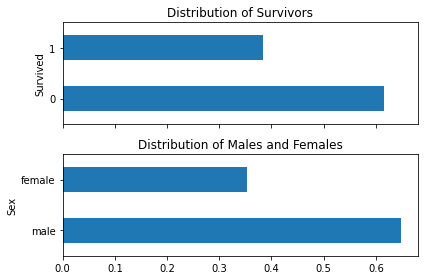

In [13]:
fig, ax = plt.subplots(2, 1, sharex=True)

dist_target = titanicSurvived.shape[0]

(titanicTrainingData['Survived']
    .value_counts()
    .div(dist_target)
    .plot.barh(title="Distribution of Survivors", ax=ax[0])
)
ax[0].set_ylabel("Survived")

(titanicTrainingData['Sex']
    .value_counts()
    .div(dist_target)
    .plot.barh(title="Distribution of Males and Females", ax=ax[1])
)
ax[1].set_ylabel("Sex")


fig.tight_layout()

**My observations from the chart**

*1. In the training dataset, an estimated 40% of passengers survived the mishap*

*2. Of the estimated 40%, female survivors make up more than 60%, males less than 40%*

*3. Why do we have more female survivors than males? Is that a relevant question?*

*4. Should this be taken into consideration as I proceed?*

**I think I'll plot more charts to understand the relationships between the target variable(Survived) and other independent variables.**

**By doing this, I think I'll definitely hit some snags that will inform data processing**

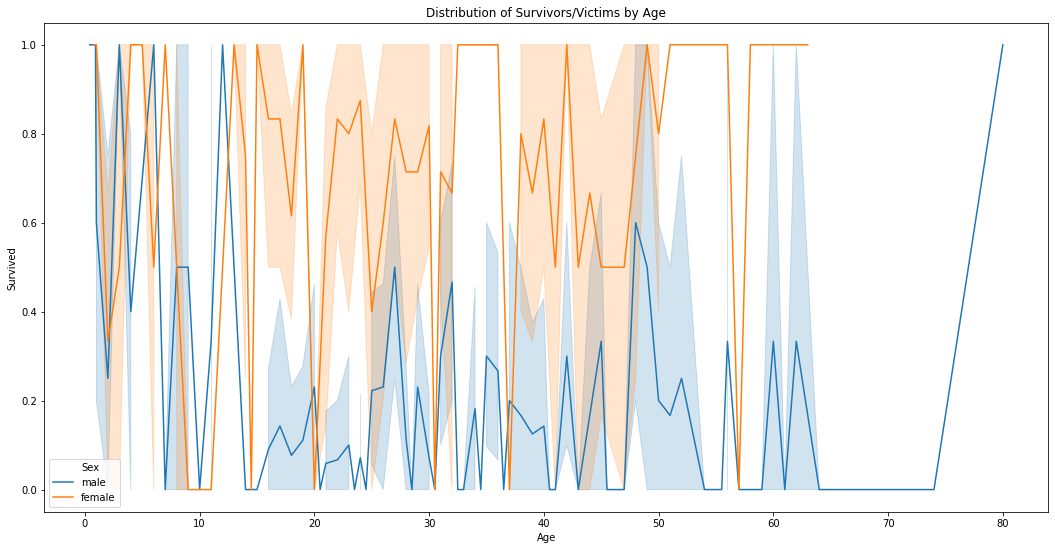

In [14]:
plt.figure(figsize=(18,9)) 

sns.lineplot(x = 'Age', y = 'Survived', hue = 'Sex', data = titanicTrainingData)
plt.title("Distribution of Survivors/Victims by Age")
plt.show()

**Observations**

*1. I think age plays a major factor in the survival numbers. A lot of the female survivors are within the Age group 3 - 48 yrs*

*2. I think the motto for helping people to safety was "women and children"*

*3. A good number of men who survived where the elderly*

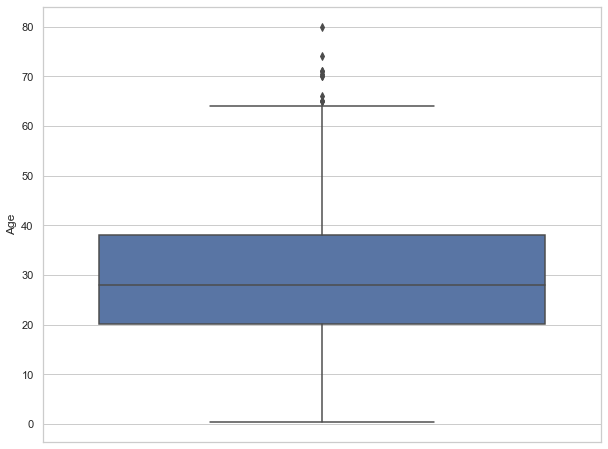

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='Age', data=titanicTrainingData, orient="v")

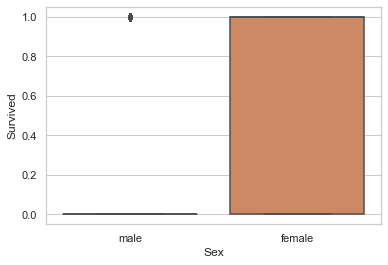

In [16]:
ax = sns.boxplot(x='Sex', y='Survived', data=titanicTrainingData, orient="v")

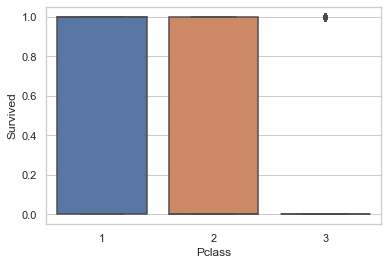

In [17]:
ax = sns.boxplot(x='Pclass', y='Survived', data=titanicTrainingData, orient="v")

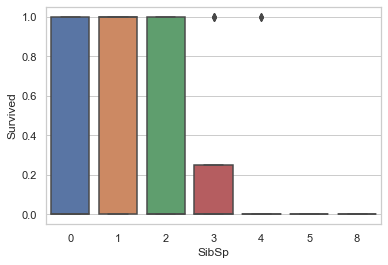

In [18]:
ax = sns.boxplot(x='SibSp', y='Survived', data=titanicTrainingData, orient="v")

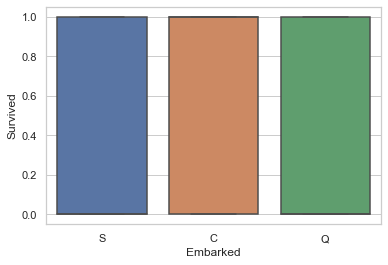

In [19]:
ax = sns.boxplot(x='Embarked', y='Survived', data=titanicTrainingData, orient="v")

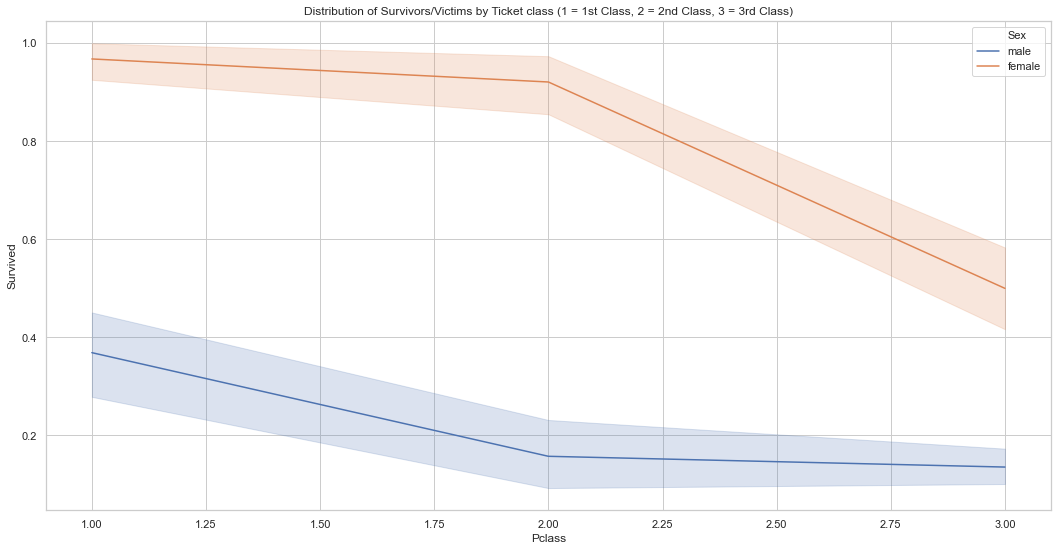

In [20]:
plt.figure(figsize=(18,9)) # ah.. the sweet 18 by 9 ratio

sns.lineplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanicTrainingData)
plt.title("Distribution of Survivors/Victims by Ticket class (1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class)")
plt.show()

In [21]:
counts = (titanicTrainingData[['Sex', 'Survived']]
              .groupby(['Sex', 'Survived'])
              .size()
              .unstack('Survived')
         )
counts

Survived,0,1
Sex,,
female,81,233
male,468,109


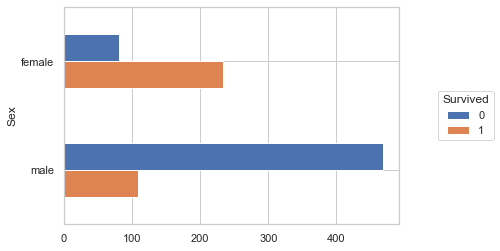

In [22]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='Survived'
)

In [23]:
survived_counts = counts.sum(axis='columns')
survived_counts

Sex
female    314
male      577
dtype: int64

In [24]:
props = counts.div(survived_counts, axis='index')
props

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


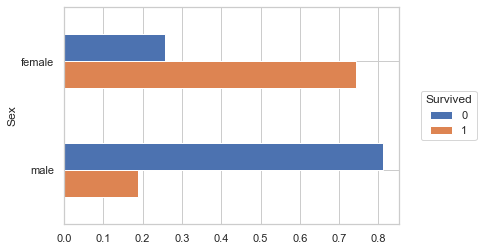

In [25]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='Survived'
)

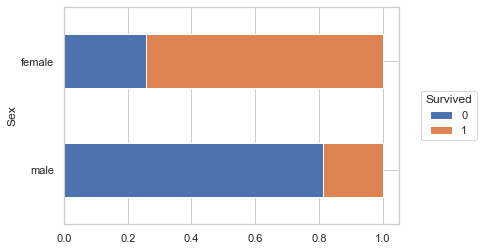

In [26]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5),
    title='Survived'
)

In [27]:
def survived_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of survivor rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (titanicTrainingData[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

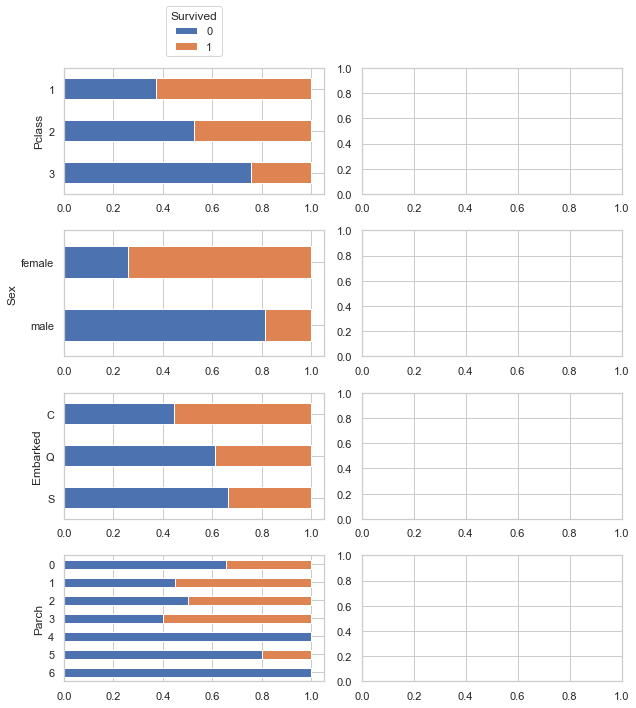

In [28]:
cols_to_plot = [
    'Pclass',
    'Sex',
    'Embarked',
    'Parch'
]

fig, ax = plt.subplots(
    len(cols_to_plot),2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    survived_rate_plot(
        col, 'Survived', titanicTrainingData, ax=ax[idx, 0]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='Survived'
)
fig.tight_layout()

**Obervations and what to do next**

*1. So far the following feature variables have an important correlation with survived; Sex, Pclass, Embarked, Age, Ticket class, Parents & Children.*

*2. Certain features like cabin, fare and # of siblings & spouses, ticket.. remain sketchy*

*3. Find out features with missing values and see if there's any significant difference* 


In [29]:
# distribution of numerical features
titanicTrainingData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
# distribution of categorical features
titanicTrainingData.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Slemen, Mr. Richard James",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [31]:
# Checking for Unique values over rows & Columns
titanicTrainingData.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [32]:
# Missing Values
titanicTrainingData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
titanicTrainingData.duplicated().sum()

0

**Analyze by Pivoting**

In [34]:
titanicTrainingData[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [35]:
titanicTrainingData[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [36]:
titanicTrainingData[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [37]:
titanicTrainingData[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [38]:
titanicTrainingData[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [39]:
titanicTrainingData[["Ticket", "Survived"]].groupby(['Ticket'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Ticket,Survived
0,110152,1.0
180,26360,1.0
483,386525,1.0
479,382651,1.0
151,244373,1.0
...,...,...
385,349246,0.0
384,349245,0.0
197,2669,0.0
382,349243,0.0


**I want to compute the missing values of the following features: Age & Embarked**

**I will likely drop certain features that has little or no correlation with survival on the Titanic. Features like 'PassengerId', 'Ticket', 'Cabin', & 'Name'**

**I tried to visualize the Age feature in correlation with the target variable, but hit a snag because the values won't make for easy visualization. I tried to create an Age group feature to see if I can visualize that.**

**Still don't know what to do with the Fare feature**

**It is safe to say women survived more than men**

**Age is a factor for survival, children and old folks**

**Ticket class is a major factor for survival, the upper class folks survived more than other classes(pot of beans something)**

**Finally, I figured how to visualize the Age feature to find any existing correlation with the target variable**

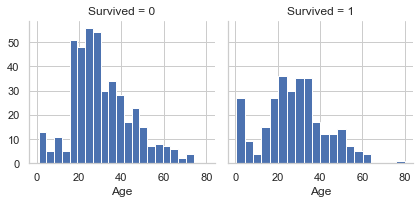

In [40]:
g = sns.FacetGrid(titanicTrainingData, col='Survived')
g.map(plt.hist, 'Age', bins=20);

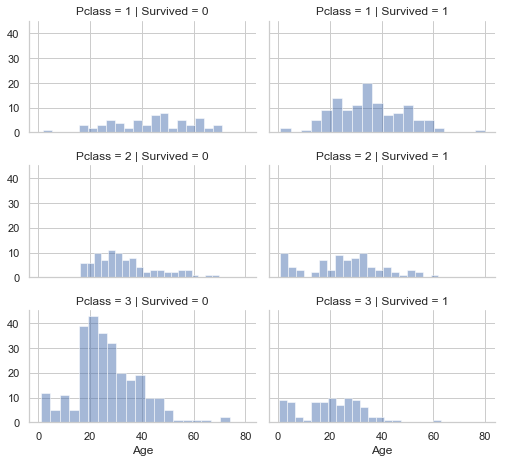

In [41]:
# grid = sns.FacetGrid(titanicTrainingData, col='Pclass', hue='Survived')
grid = sns.FacetGrid(titanicTrainingData,
                     col='Survived',
                     row='Pclass',
                     height=2.2,
                     aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

/Users/peterokwukogu/anaconda3/envs/data_sci/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/peterokwukogu/anaconda3/envs/data_sci/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


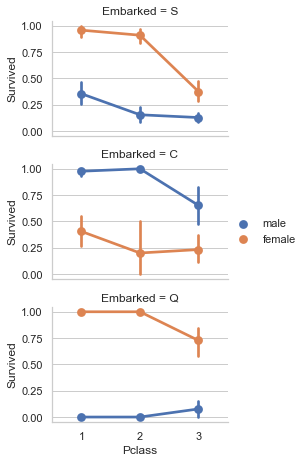

In [42]:
# grid = sns.FacetGrid(titanicTrainingData, col='Embarked')
grid = sns.FacetGrid(titanicTrainingData, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/Users/peterokwukogu/anaconda3/envs/data_sci/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


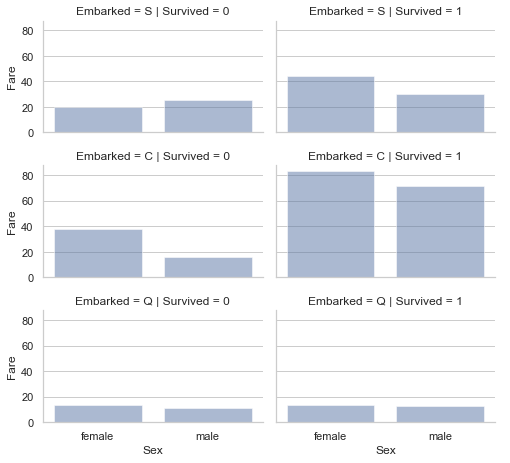

In [43]:
# grid = sns.FacetGrid(titanicTrainingData, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(titanicTrainingData, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend();

**Time to drop some features and see if there's need for recode and new columns**

*I think the PassengerId, Cabin & Ticket features doesn't serve much in the grand scheme of this classification*

*It is also important to note that this operation will be performed on the train and test data*

In [44]:
titanicTrainingData.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [45]:
titanicTestData.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


**The shape of the train & test dataset before dropping unwanted features**

In [46]:
print("Before", titanicTrainingData.shape, titanicTestData.shape, combinedDataset[0].shape, combinedDataset[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)


**Dropping the Cabin and Ticket features from the train dataset**

In [47]:
titanicTrainingData = titanicTrainingData.drop(['Ticket', 'Cabin'], axis=1)

**Dropping the Cabin and Ticket features from the test dataset**

In [48]:
titanicTestData = titanicTestData.drop(['Ticket', 'Cabin'], axis=1)

**After dropping the features, I combine the train & test like I did intially**

*I don't have any technical reason for combining train and test but it feels good to replicate what I have noticed in other notebooks*

In [49]:
combinedDataset = [titanicTrainingData, titanicTestData]

**The shape of the train & test dataset after dropping unwanted features**

In [50]:
"After", titanicTrainingData.shape, titanicTestData.shape, combinedDataset[0].shape, combinedDataset[1].shape

('After', (891, 10), (418, 9), (891, 10), (418, 9))

**There is one feature that I don't understand, the Name feature**

*After reading through other notebooks on kaggle, a kaggle user suggested extracting the titles from the Name feature, then test for correlation*

In [51]:
titanicTrainingData['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

*Using a for loop & regular expression(regex) to extract and create a new column*

In [52]:
for dataset in combinedDataset:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [53]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs


*pandas.crosstab is a function that computes a simple cross tabulation of two (or more) factors.*

In [54]:
crossTabulation = pd.crosstab(titanicTrainingData['Title'], titanicTrainingData['Sex'])
crossTabulation.head()

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6


*Trying to make sense of the Name feature*

*Extracted the Titles and created a new feature column*

*According to a notebook I followed, It was suggested I coverted the Title feature to ordinal variables*

*Ranking them from 'Mr', 'Miss', etc*

In [55]:
titanicTrainingData['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [56]:
for dataset in combinedDataset:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [57]:
# Tying the Title feature to the target variable and the correlation is fascinating
titanicTrainingData[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


*Then converting the categorical titles to ordinal.*

In [58]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combinedDataset:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [59]:
titanicTrainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


**Dropping features that are not needed**

*The PassengerId and Name features aren't necessary anymore*

*They will be dropped from the train and test sets**

In [60]:
# Dropping the passengerid and name features from the training dataset
titanicTrainingData = titanicTrainingData.drop(['Name', 'PassengerId'], axis=1)

In [61]:
titanicTrainingData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [62]:
# Dropping the passengerid and name features from the test dataset
titanicTestData = titanicTestData.drop(['Name', 'PassengerId'], axis=1)

In [63]:
titanicTestData.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,1
1,3,female,47.0,1,0,7.0000,S,3
2,2,male,62.0,0,0,9.6875,Q,1
3,3,male,27.0,0,0,8.6625,S,1
4,3,female,22.0,1,1,12.2875,S,3


*I combine both datasets*

*Why? I swear, this is one of those times I feel it's a sexy thing to do* 😃

In [64]:
combinedDataset = [titanicTrainingData, titanicTestData]

In [65]:
titanicTrainingData.shape, titanicTestData.shape

((891, 9), (418, 8))

**Converting Categorical features that contain strings to numerical values**

In [66]:
titanicTrainingData['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

*A lot of machine learning models cannot handle categorical variables, hence the need to convert to numerical values*

*I would convert the Sex feature to numerical values where female is mapped to 1 and male is mapped to 0*

*Here is an actual reason why the combination of train and test dataset is crucial*

In [67]:
for dataset in combinedDataset:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [68]:
titanicTrainingData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


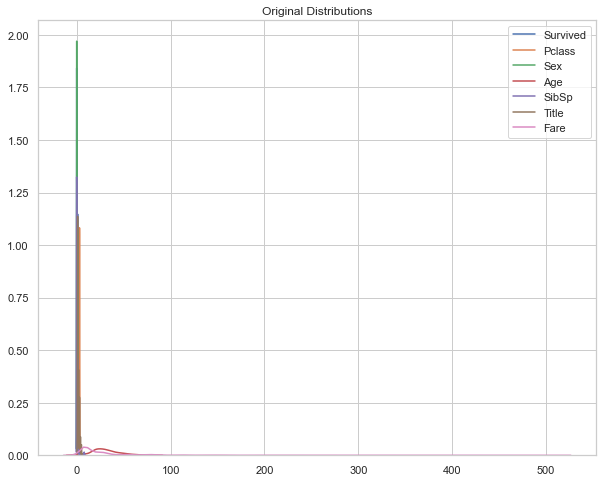

In [69]:
# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(titanicTrainingData['Survived'], ax=ax1)
sns.kdeplot(titanicTrainingData['Pclass'], ax=ax1)
sns.kdeplot(titanicTrainingData['Sex'], ax=ax1)
sns.kdeplot(titanicTrainingData['Age'], ax=ax1)
sns.kdeplot(titanicTrainingData['SibSp'], ax=ax1)
#sns.kdeplot(titanicTrainingData['Parch'], ax=ax1)
sns.kdeplot(titanicTrainingData['Title'], ax=ax1)
sns.kdeplot(titanicTrainingData['Fare'], ax=ax1);

In [70]:
 titanicTestData.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,Q,1
1,3,1,47.0,1,0,7.0000,S,3
2,2,0,62.0,0,0,9.6875,Q,1
3,3,0,27.0,0,0,8.6625,S,1
4,3,1,22.0,1,1,12.2875,S,3


**Estimating and completing missing values**

*Commencing with the Age feature*

**The question is; How does one estimate and complete missing age values?** 😥

**I read through some notebooks by a Kaggle users and decided to implement an idea for a start**

*Guessing the missing age values using the correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on*

**Of course, there are other ways to achieve this e.g. generating random numbers between mean and standard deviation**

**Started by visualizing the distribution of Age amongst the different Ticket classes**

*Males = 0 & Females = 1*

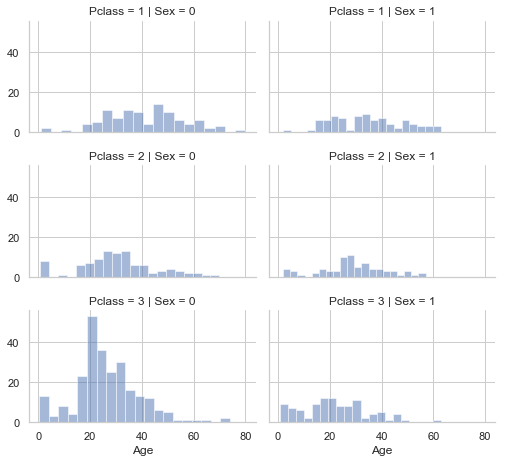

In [71]:
grid = sns.FacetGrid(titanicTrainingData, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Since the idea is to guess the missing values in the Age feature by using median values for Age across sets of Pclass and Gender feature combinations, An empty array is prepared that will contain the eventual values**

In [72]:
guess_ages = np.zeros((2,3)) # Returns a new array of given shape and type, filled with zeros.
guess_ages # 2 rows by 3 column array

array([[0., 0., 0.],
       [0., 0., 0.]])

*Using a for loop, iterations are made through the array-guess_ages(2,3)*

*guess_data is assigned the values of the iterations*

*The median values of the guess_data is assigned to age_guess*

*The random age values are rounded of to the nearest .5 and assigned to the initial array-guess_ages*

*Using a for loop, iterations are made by accessing a group of rows and columns by label(s) or a boolean 
array(dataset.loc) and assigned to the array-guess_ages*

*The input type for Age is then converted to integer*

In [73]:
for dataset in combinedDataset:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_data = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_data.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [74]:
titanicTrainingData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


**Back in the day 😁 when I was analyzing the correlation between the Age feature and the target variable**

*I noticed there was an age-group scenario with respect to Survived.*

*Based on my studies, here is another scenario*

*Create an age-group and eyeball the correlation with Survived*

In [75]:
titanicTrainingData['AgeBand'] = pd.cut(titanicTrainingData['Age'], 5)

In [76]:
titanicTrainingData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,1,"(32.0, 48.0]"


*Using a pivot* 👇🏽

In [77]:
titanicTrainingData[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


*Then replace the Age feature with ordinals based off of the AgeBand* 👇

In [78]:
for dataset in combinedDataset:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [79]:
titanicTrainingData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


*Drop the AgeBand feature* 🙂

In [80]:
titanicTrainingData = titanicTrainingData.drop(['AgeBand'], axis=1)

In [81]:
combinedDataset = [titanicTrainingData, titanicTestData]

In [82]:
titanicTrainingData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


**The SibSp(# of siblings / spouses aboard the Titanic) & Parch (# of parents / children aboard the Titanic) features**

*Both features are similar, talking about family.*

*The notebook I have read get's me confused, I have to think this on my own*
    
*I'll analyze the correlation between Survived and SibSip & Parch*


In [83]:
titanicTrainingData[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [84]:
titanicTrainingData[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Completing missing values in the Embarked feature**


In [85]:
titanicTrainingData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

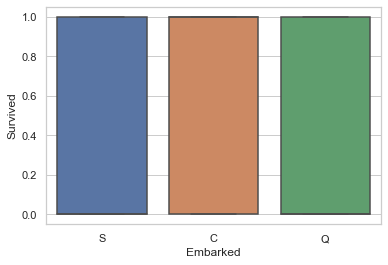

In [86]:
ax = sns.boxplot(x='Embarked', y='Survived', data=titanicTrainingData, orient="v")

*There are 3 ports used to embark the Titanic: 'S', 'C', & 'Q'*

*The idea is to fill the missing values with the port with the highest frequency of embarked*

*Find the port with the highest frequency*

In [87]:
highestFreqPort= titanicTrainingData.Embarked.dropna().mode()[0]

In [88]:
highestFreqPort

'S'

In [89]:
for dataset in combinedDataset:
    dataset['Embarked'] = dataset['Embarked'].fillna(highestFreqPort)

In [90]:
titanicTrainingData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [91]:
titanicTrainingData[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


*Convert the Embark feature values to ordinal*

In [92]:
for dataset in combinedDataset:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [93]:
titanicTrainingData['Embarked'].head()

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64

**Working on the Fare feature**

In [94]:
titanicTrainingData['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [95]:
titanicTrainingData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [96]:
titanicTestData.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
Title       0
dtype: int64

*Fill in the missing value for Fare in the test data set*

*Convert the Fare values to ordinals using Fare ranges*

In [97]:
titanicTestData['Fare'].fillna(titanicTestData['Fare'].dropna().median(), inplace=True)
titanicTestData.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [98]:
titanicTrainingData['FareRange'] = pd.qcut(titanicTrainingData['Fare'], 4)

**pandas.qcut** I swear, I'm seeing this for the first time 😳

*Quantile-based discretization function.*

*Discretize variable into equal-sized buckets based on rank or based on sample quantiles*

In [99]:
titanicTrainingData[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)

,FareRange,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [100]:
titanicTrainingData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareRange
0,0,3,0,1,1,0,7.2500,0,1,"(-0.001, 7.91]"
1,1,1,1,2,1,0,71.2833,1,3,"(31.0, 512.329]"
2,1,3,1,1,0,0,7.9250,0,2,"(7.91, 14.454]"
3,1,1,1,2,1,0,53.1000,0,3,"(31.0, 512.329]"
4,0,3,0,2,0,0,8.0500,0,1,"(7.91, 14.454]"


*After grouping by FareRange and checking the correlation with Survived*

*Convert the Fare feature to ordinals*

In [101]:
for dataset in combinedDataset:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [102]:
titanicTrainingData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareRange
0,0,3,0,1,1,0,0,0,1,"(-0.001, 7.91]"
1,1,1,1,2,1,0,3,1,3,"(31.0, 512.329]"
2,1,3,1,1,0,0,1,0,2,"(7.91, 14.454]"
3,1,1,1,2,1,0,3,0,3,"(31.0, 512.329]"
4,0,3,0,2,0,0,1,0,1,"(7.91, 14.454]"


In [103]:
# Drop the FareRange column after ranking the Fare features
titanicTrainingData = titanicTrainingData.drop(['FareRange'], axis=1)

In [104]:
combinedDataset = [titanicTrainingData, titanicTestData]
    
titanicTrainingData.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,0,0,1
1,1,1,1,2,1,0,3,1,3
2,1,3,1,1,0,0,1,0,2
3,1,1,1,2,1,0,3,0,3
4,0,3,0,2,0,0,1,0,1


In [105]:
#titanicTrainingData.to_csv('titanic_clean.csv', index=False)

In [106]:
titanicTestData.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,2,0,0,0,2,1
1,3,1,2,1,0,0,0,3
2,2,0,3,0,0,1,2,1
3,3,0,1,0,0,1,0,1
4,3,1,1,1,1,1,0,3


**Train model and predict**

*Which machine learning algorithm is fit for this and why?*

*List of chosen machine learning models*

*To predict who is likely to survive based on each row of observations is a classification problem*

*The following are machine learning Classification Algorithms*

1. Logistic Regression
2. Naive Bayes
3. Stochastic Gradient Descent
4. K-Nearest Neighbors
5. Decision Tree
6. Random Forest
7. Artificial Neural Network
8. Support Vector Machine
9. Perceptron
10. RVM or Relevance Vector Machine

*I'll start with Logistic Regression*

*In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick.* 

*Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable*

*Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1"*

Reference: https://en.wikipedia.org/wiki/Logistic_regression

*This has been imported 'from sklearn.linear_model import LogisticRegression'*

In [107]:
# Remove the Survived feature from the train dataset
X_train = titanicTrainingData.drop("Survived", axis=1)

In [108]:
# X_train are the feature sets
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,1,1,0,0,0,1
1,1,1,2,1,0,3,1,3


In [109]:
# Y_train is the target set
Y_train = titanicTrainingData["Survived"]

In [110]:
Y_train.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [111]:
# Assign the test set to X_test
X_test = titanicTestData
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,2,0,0,0,2,1
1,3,1,2,1,0,0,0,3
2,2,0,3,0,0,1,2,1
3,3,0,1,0,0,1,0,1
4,3,1,1,1,1,1,0,3


In [112]:
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [113]:
# Logistic Regression 
logreg = LogisticRegression() # Logistic Regression Algorithm
logreg.fit(X_train, Y_train) # Fitting Logistic Regression to X_train & Y_train
Y_pred = logreg.predict(X_test) # Predicting with the test set (X_test) 

In [114]:
accuracy_log = round(logreg.score(X_train, Y_train) * 100,2) 
# Return the mean accuracy on the given train data and labels
# Multiplied by 100 & rounded to 2 decimal places
accuracy_log

79.69

**"We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function"- Referenced the Kaggle User whose notebook I read**

**"Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability)" - Referenced the Kaggle User whose notebook I read**

In [115]:
coeff_titanicData = pd.DataFrame(titanicTrainingData.columns.delete(0))
coeff_titanicData.columns = ['Feature']
coeff_titanicData["Correlation"] = pd.Series(logreg.coef_[0])

coeff_titanicData.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.166098
7,Title,0.484436
5,Fare,0.292674
6,Embarked,0.278634
2,Age,-0.035416
4,Parch,-0.213917
3,SibSp,-0.390244
0,Pclass,-0.677359


- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

**Referenced the Kaggle User whose notebook I read**

**Support-vector machines**

*In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.*

*Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier*

https://en.wikipedia.org/wiki/Support_vector_machine

In [116]:
svc = SVC() # Support Vector Classification
svc.fit(X_train, Y_train) # Fit the SVM model according to the given training data
Y_pred = svc.predict(X_test) # Perform classification on samples in Test

In [117]:
accuracy_svc = round(svc.score(X_train, Y_train) * 100, 2) # Return the mean accuracy on the given train data and labels
# Multiply by 100 and round to two decimal places
accuracy_svc

82.04

ValueError: x and y must be the same size

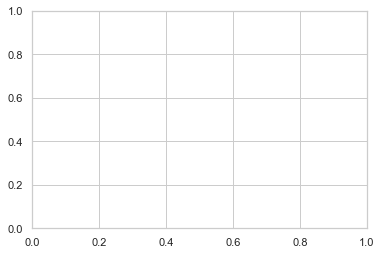

In [134]:
## The line / model
plt.scatter(Y_train, Y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

**k-Nearest Neighbors algorithm (or k-NN for short)**

*In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method proposed by Thomas Cover used for classification and regression*

*In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors*

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [118]:
knn = KNeighborsClassifier(n_neighbors = 3) # Finds the K-neighbors # Number of neighbors to use
knn.fit(X_train, Y_train) # Fit the model using X as training data and y as target values
Y_pred = knn.predict(X_test) # Predict the class labels for the provided data.

In [119]:
accuracy_knn = round(knn.score(X_train, Y_train) * 100, 2) # Return the mean accuracy on the given train data
# Multiplied by 100 & rounded to two decimal points
accuracy_knn

85.97

**Naive Bayes classifier**

*In machine learning, naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models*

https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [120]:
gaussian = GaussianNB() # Gaussian Naive Bayes (GaussianNB)
gaussian.fit(X_train, Y_train) # Fit Gaussian Naive Bayes according to X, Y
Y_pred = gaussian.predict(X_test) # Perform classification on an array of test vectors X

In [121]:
accuracy_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2) # Return the mean accuracy on the given train data and labels.
# Multiplied by 100 & rounded to two decimal places/
accuracy_gaussian

78.79

**Perceptron**

*Perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class*

https://en.wikipedia.org/wiki/Perceptron

In [122]:
perceptron = Perceptron() # Perceptron classification algorithm
perceptron.fit(X_train, Y_train) # Fit perceptron according to X & Y
Y_pred = perceptron.predict(X_test) # Predict class labels for samples in X

In [123]:
accuracy_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2) # Return the mean accuracy on the given train data and labels
accuracy_perceptron

78.23

**Random Forest**

*Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees*

https://en.wikipedia.org/wiki/Random_forest

In [124]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

In [125]:
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

89.11

**Model evaluation**

*Ranking the evaluation of of all models*

*Choose the best performing model*

In [126]:
models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'Support Vector Machines', 'KNN', 'Naive Bayes',
        'Perceptron', 'Random Forest'
    ],
    'Score': [
        accuracy_log, accuracy_svc, accuracy_knn, accuracy_gaussian,
        accuracy_perceptron, acc_random_forest
    ]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Random Forest,89.11
2,KNN,85.97
1,Support Vector Machines,82.04
0,Logistic Regression,79.69
3,Naive Bayes,78.79
4,Perceptron,78.23


In [127]:
df_test = pd.read_csv('test.csv')

In [128]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred
    })

In [129]:
submission.to_csv('my_submission.csv', index=False)

In [130]:
!ls

100 Days of Titanic Machine Learning - Part 1.ipynb
My 100 Days of Titanic Machine Learning - Part 2.ipynb
README.md
Titanic Advanced Feature Engineering Tutorials.ipynb
Titanic Data Science Solutions.ipynb
my_submission.csv
submissions.csv
test.csv
train.csv
train_titanic.csv


In [131]:
df_sub = pd.read_csv('my_submission.csv')
df_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
